In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import skew
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv('./sample_data/winequality-red.csv')

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
#Verifying if there are any null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45347cfe10>,
      dtype=object)

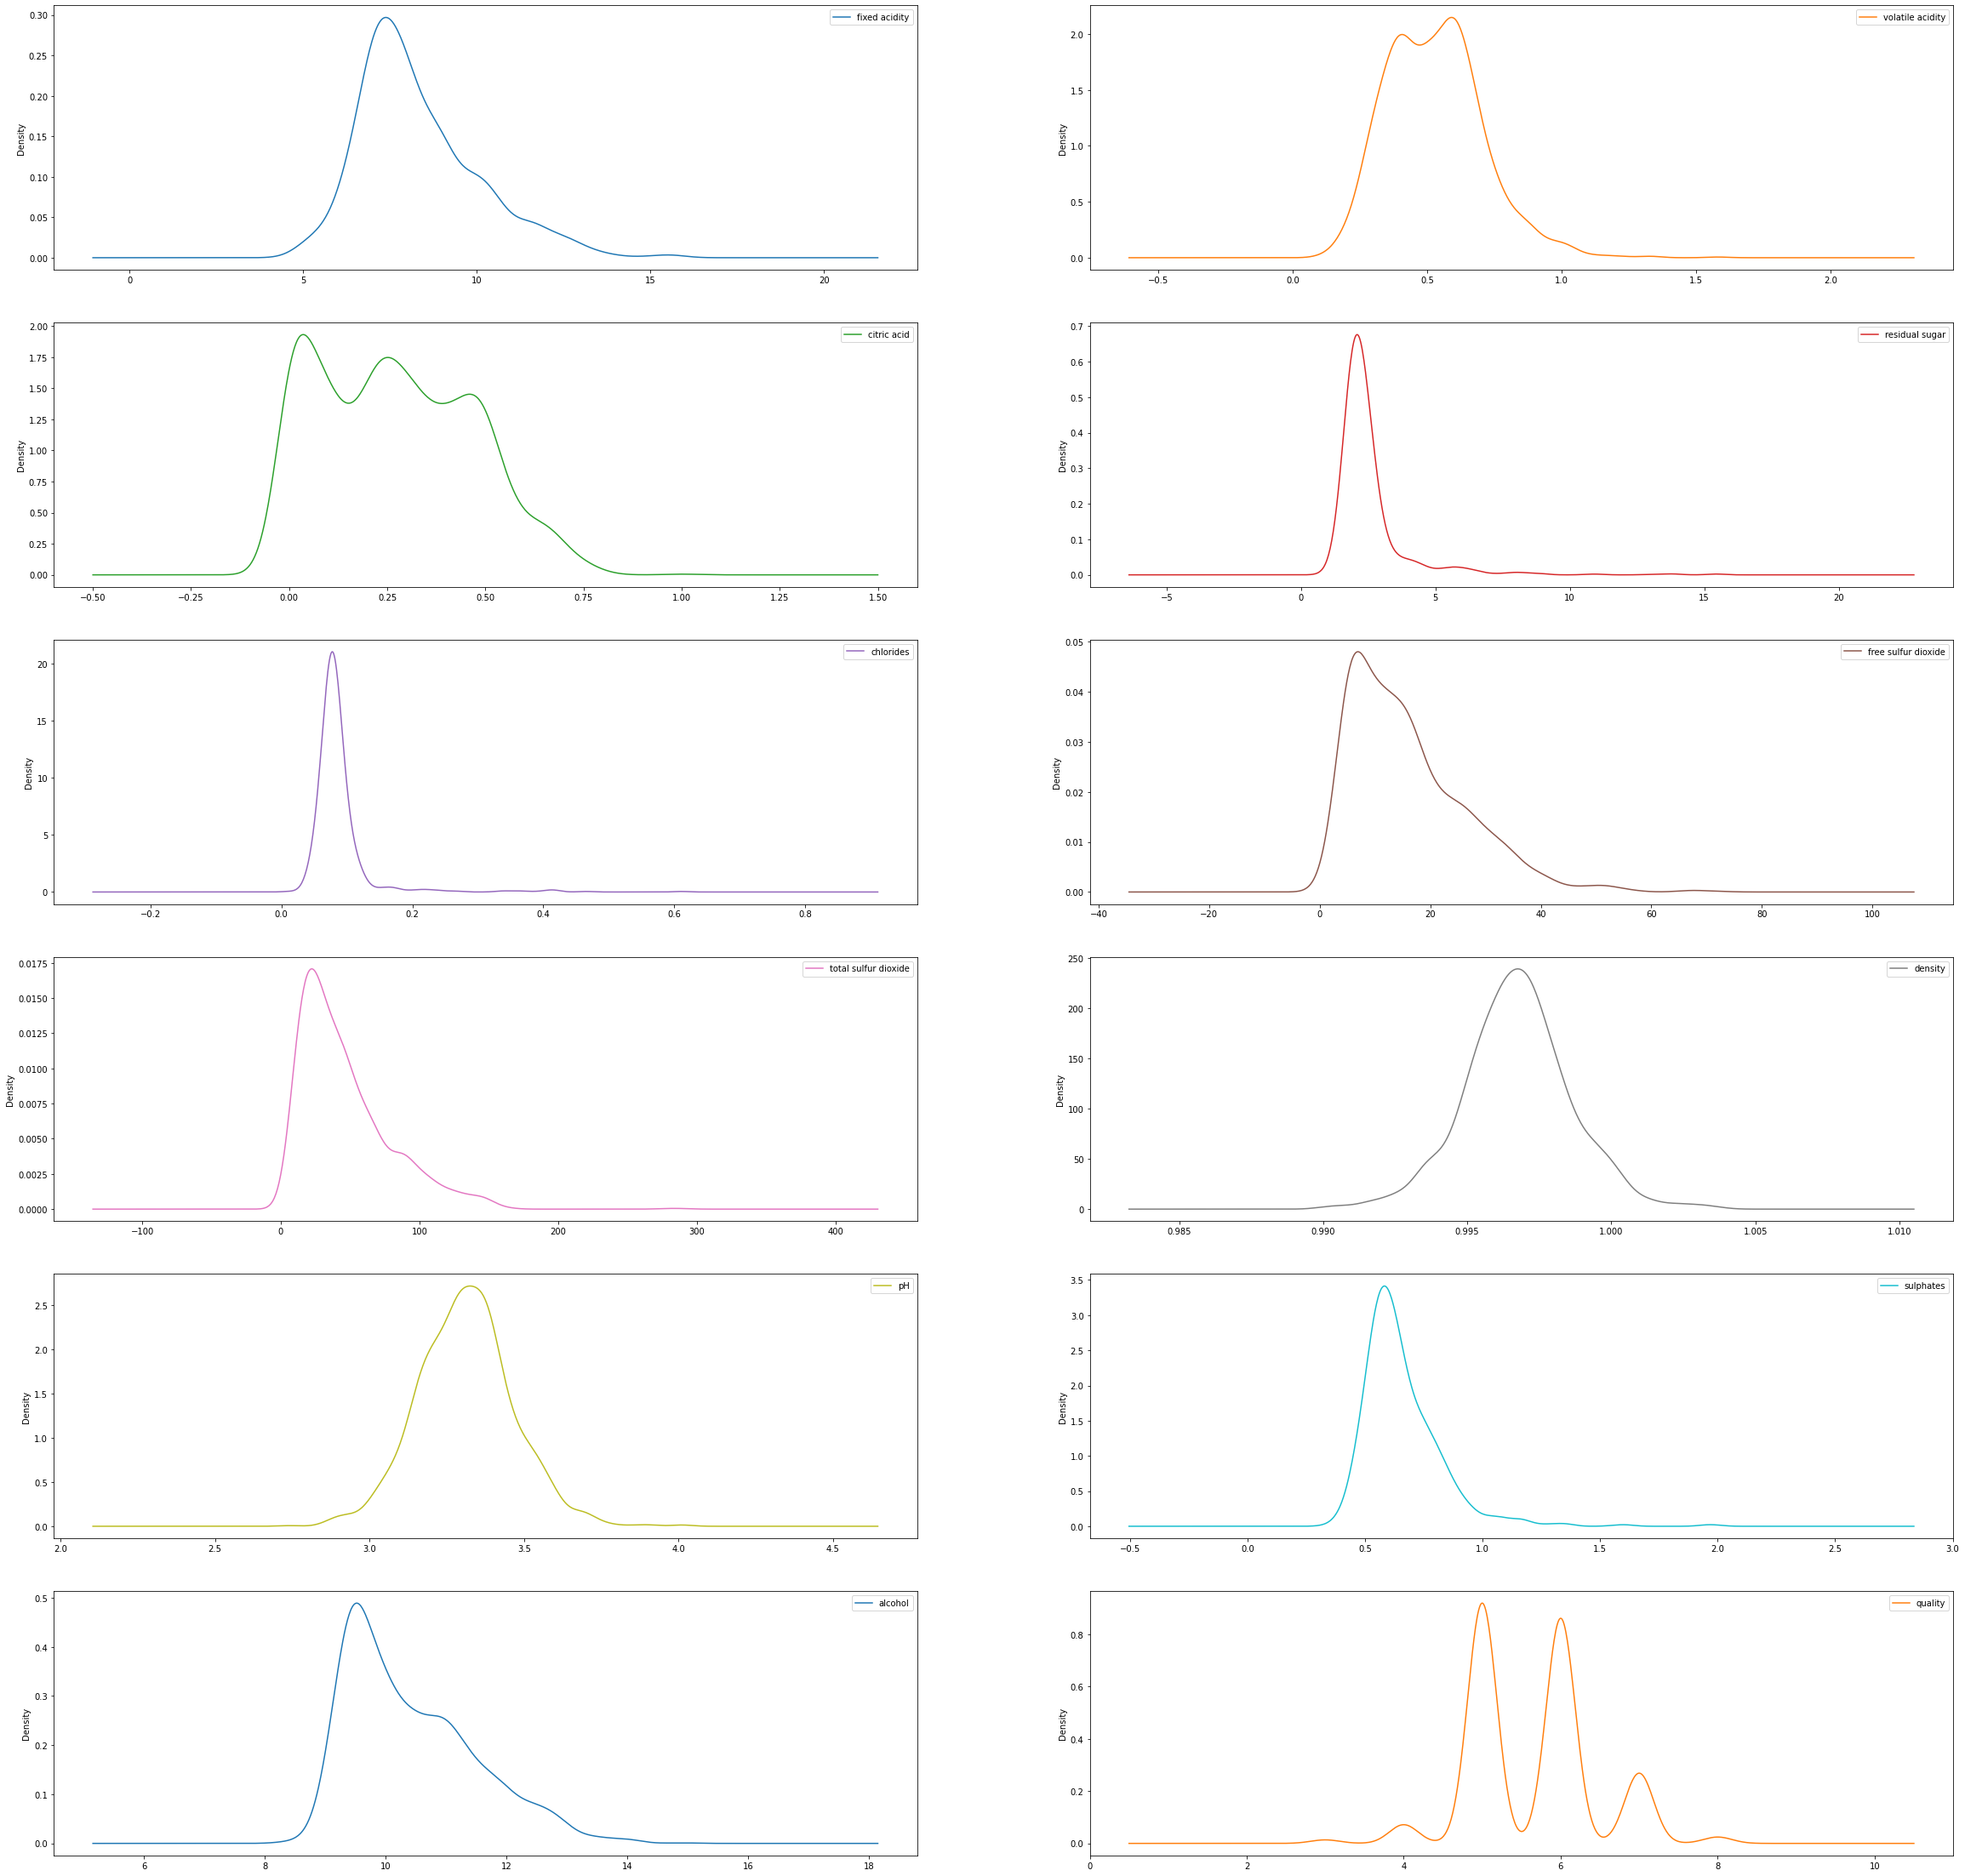

In [7]:
data.plot(kind = 'kde' , subplots = True , layout=(6,2), sharex=False, sharey=False, figsize=(40,40))

In [8]:
# Finiding Skewness of the variables

for column in data.columns:
  print(column ,' : ' , skew(data[column], axis=0, bias=True, nan_policy='omit'))

fixed acidity  :  0.9818292953262073
volatile acidity  :  0.6709623963499574
citric acid  :  0.3180385895475358
residual sugar  :  4.536394788805638
chlorides  :  5.675016527504258
free sulfur dioxide  :  1.249393847434253
total sulfur dioxide  :  1.5141091878506638
density  :  0.07122077153539946
pH  :  0.19350175891005525
sulphates  :  2.426393455449087
alcohol  :  0.8600210646566755
quality  :  0.21759720553467285


In [9]:
# log transform chlorides column
log_chlorides = data[['chlorides']].applymap(lambda x: np.log(x))
log_chlorides.columns = 'log_' + log_chlorides.columns
log_chlorides.skew()

log_chlorides    1.745215
dtype: float64

In [10]:
data.insert(6,"log_chlorides",log_chlorides)

In [11]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,log_chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,-2.577022,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,-2.322788,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,-2.385967,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,-2.590267,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,-2.577022,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,-2.407946,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,-2.780621,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,-2.577022,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,-2.590267,44.0,0.99547,3.57,0.71,10.2,5


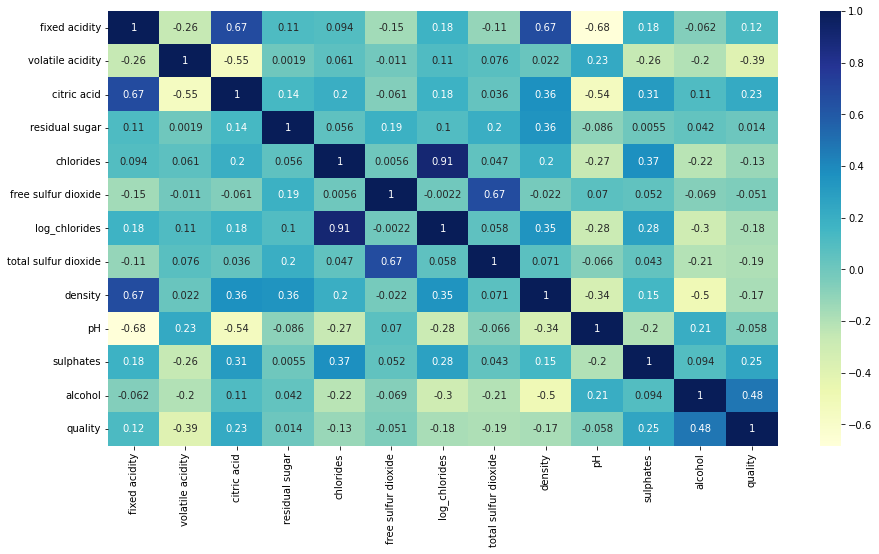

In [12]:
# Correlation analysis
fig, ax = plt.subplots(figsize = (15,8))
sns.heatmap(data.corr(), annot = True ,cmap="YlGnBu")

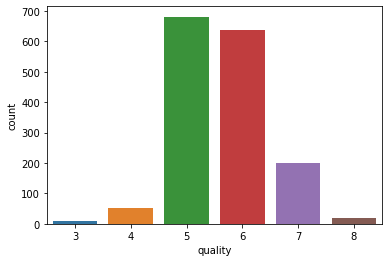

In [13]:
# Count of wine quality
sns.countplot(x="quality", data=data)

In [14]:
data['quality']. value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [15]:
# Preprocessing the data 
data['quality'] = [ 1 if x>=6 else 0 for x in data['quality']]

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,log_chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,-2.577022,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,-2.322788,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,-2.385967,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,-2.590267,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,-2.577022,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,-2.407946,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,-2.780621,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,-2.577022,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,-2.590267,44.0,0.99547,3.57,0.71,10.2,0


In [16]:
#conversion into 0's and 1's for logistic regression model
data['quality']. value_counts()

1    855
0    744
Name: quality, dtype: int64

In [17]:
# Developing Logit Regression model
X = data.drop(labels='quality', axis=1).values
y = data['quality'].values


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
log_model = LogisticRegression( solver = 'liblinear' , random_state=0)
log_model

LogisticRegression(random_state=0, solver='liblinear')

In [20]:
log_model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [21]:
y_pred = log_model.predict(X_test)

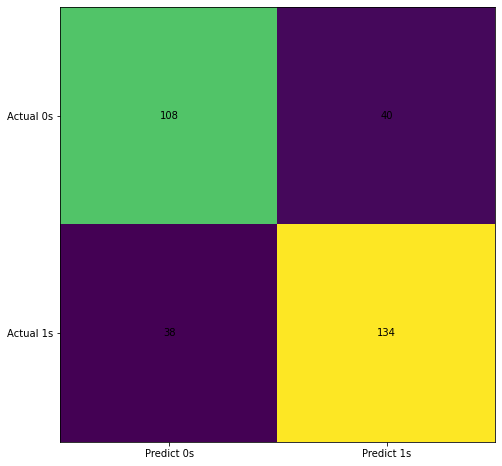

In [22]:
# Confusion matrix to find the test scores for logistic regression
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predict 0s', 'Predict 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       148
           1       0.77      0.78      0.77       172

    accuracy                           0.76       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.76      0.76      0.76       320



In [24]:
# Finding accuracy of the model
log_model.score(X_test, y_test)

0.75625

In [25]:
print(confusion_matrix(y_test, y_pred , labels = [0,1]))

[[108  40]
 [ 38 134]]
